# Hemato using RNA-velocity 

We use the familiar bone marrow dataset (Setty et al 2019) but show how to analyze this dataset using a combination of RNA-velocity and gene-gene similarities. Relying purely on RNA-velocity has been noted to be difficult on this dataset due to a boost in expression (Bergen 2021) which yields negative directionality. **By allowing the RNA velocity and gene-gene based graph structure to work together, we can arrive at a more sensible analysis. In Via this is controlled by velo_weight.**

### Common visualization pitfalls
We also take the opportunity to show that the underlying via graph is less susceptible to directionality artefacts than visualizations that project the trajectory onto umap/tsne/phate for interpretation. There is no doubt that 2D visualizations are useful and intuitive, but we find that can be instances where the visualized directionality is distorted by the 2D single cell embedding and it can therefore be useful to a) refer back to the via graph based abstraction and b) plot the trajectory on a few types of embeddings to overcome any distortions specific to a visualization method.



### Load data and pre-process

In [1]:
import core_via2 as via
import scvelo as scv
import scanpy as sc
import matplotlib.pyplot as plt

adata = scv.datasets.bonemarrow()
print(adata)

n_pcs =80
n_neighbors=30

scv.pp.filter_and_normalize(adata, min_shared_counts=20)#, n_top_genes=hvg)
sc.pp.pca(adata, n_comps=n_pcs)
print('Start scvelo...')
title = 'scVelo stochastic mode' #this is faster but you can also use 'dynamical'
scv.pp.moments(adata, n_pcs=n_pcs, n_neighbors=n_neighbors)
scv.tl.velocity(adata, mode='stochastic')




AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'
Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
Start scvelo...
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [2]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 4) + inhomogeneous part.

**The scvelo plot shows negative direction in some regions**

In [3]:
adata.uns['clusters_colors'] = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
scv.pl.velocity_embedding_stream(adata, color='clusters', dpi=100, title=title)

computing velocity embedding


ValueError: You need to run `tl.velocity_graph` first to compute cosine correlations.

### Run VIA

2022-04-29 11:54:57.304416	Running VIA over input data of 5780 (samples) x 80 (features)


2022-04-29 11:54:58.486445	Global pruning of weighted 30 -knn graph


2022-04-29 11:55:00.601603	Finished global pruning. Kept 46.37 of edges. 
2022-04-29 11:55:00.633836	Number of connected components used for clustergraph  is 1


2022-04-29 11:55:00.936347	 the number of components in the original full graph is 1
2022-04-29 11:55:00.936444	For downstream visualization purposes we are also constructing a low knn-graph 


2022-04-29 11:55:02.050860	Commencing community detection


2022-04-29 11:55:02.406207	Finished running Leiden algorithm. Found 175 clusters.
2022-04-29 11:55:02.408592	Merging 159 very small clusters (<10)
2022-04-29 11:55:02.415882	Finished detecting communities. Found 16 communities
2022-04-29 11:55:02.417255	Making cluster graph. Global cluster graph pruning level: 0.3
2022-04-29 11:55:02.443449	Graph has 1 connected components before pruning
2022-04-29 11:55:02.444971	Graph has 1 connected components before pruning n_nonz 9 30
2022-04-29 11:55:02.446404	Graph has 1 connected components after reconnecting
2022-04-29 11:55:02.446577	0.0% links trimmed from local pruning relative to start
2022-04-29 11:55:02.446608	57.1% links trimmed from global pruning relative to start


2022-04-29 11:55:03.088915	 Looking for initial states
f{datetime.now()}	Stationary distribution normed {np.round(pi,3)}
2022-04-29 11:55:03.090192	Top 3 candidates for root: [ 3 10 14] with stationary prob (%) [0.03 2.47 2.83]
2022-04-29 11:55:03.090715	top 5 candidates for terminal: [ 4  8  1 12  9]
new root is 0  with degree 6.16 HSC_1
2022-04-29 11:55:03.152403	Computing lazy-teleporting expected hitting times


2022-04-29 11:55:03.928193	Identifying terminal clusters corresponding to unique lineages...
2022-04-29 11:55:03.928420	Closeness:[0, 3, 7, 10]
2022-04-29 11:55:03.928466	Betweenness:[0, 2, 3, 5, 7, 10, 14]
2022-04-29 11:55:03.928496	Out Degree:[0, 2, 3, 7, 10, 14, 15]
2022-04-29 11:55:03.930588	Terminal clusters corresponding to unique lineages in this component are [2, 3, 7, 10, 14] 


2022-04-29 11:55:04.296802	From root 0,  the Terminal state 2 is reached 425 times.


2022-04-29 11:55:04.769583	From root 0,  the Terminal state 3 is reached 7 times.


2022-04-29 11:55:05.206542	From root 0,  the Terminal state 7 is reached 436 times.


2022-04-29 11:55:05.667292	From root 0,  the Terminal state 10 is reached 139 times.


2022-04-29 11:55:06.063376	From root 0,  the Terminal state 14 is reached 410 times.
2022-04-29 11:55:06.116335	Terminal clusters corresponding to unique lineages are [2, 3, 7, 10, 14] 
2022-04-29 11:55:06.116470	Begin projection of pseudotime and lineage likelihood


2022-04-29 11:55:07.245138	Transition matrix with weight of 0.5 on RNA velocity
2022-04-29 11:55:07.246445	Graph has 1 connected components before pruning
2022-04-29 11:55:07.247732	Graph has 1 connected components before pruning n_nonz 2 2
2022-04-29 11:55:07.251005	Graph has 1 connected components after reconnecting
2022-04-29 11:55:07.251188	55.9% links trimmed from local pruning relative to start
2022-04-29 11:55:07.251223	75.0% links trimmed from global pruning relative to start


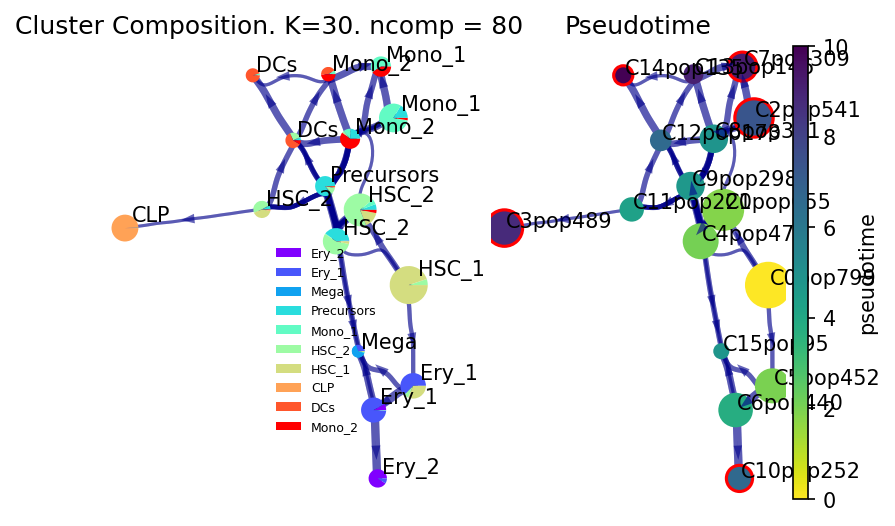

time elapsed 9.7 seconds


In [26]:
velocity_matrix = adata.layers['velocity']
gene_matrix = adata.X.todense()
embedding_original = adata.obsm['X_tsne'][:, 0:2]
data_pca = adata.obsm['X_pca'][:, 0:n_pcs]

root = ['HSC_1']
random_seed = 0
jac_std_global = 0.15
cluster_graph_pruning_std=0.3
velo_weight = 0.5 # equal contribution of velocity and gene similarity towards the direction of edges

true_label = [i for i in adata.obs['clusters']]

v0 = via.VIA(data=data_pca, true_label=true_label, jac_std_global=jac_std_global, dist_std_local=1, knn=n_neighbors,
 root_user=root, dataset='group', random_seed=random_seed,
           is_coarse=True, preserve_disconnected=True, cluster_graph_pruning_std=cluster_graph_pruning_std,
             piegraph_arrow_head_width=0.8,    piegraph_edgeweight_scalingfactor=2.5, velocity_matrix=velocity_matrix,
                    gene_matrix=gene_matrix, velo_weight=velo_weight)
v0.run_VIA()

### Different embeddings 
The directionality offered by the Via graph is consistent with the biology. However, when we project the trajectory onto different types of embeddings, we can sometimes see slightly misleading directions. We therefore show the fine-grained vector field of differentiation on the original tsne computed for this dataset and used in publications, a recomputed tsne on scanpy defaults and on umap. 


**Original tsne**
You will note that the CLP direction is into itself, however, the HSC2 point in the direction up towards CLP as we expect. Note that in the viagraph, the HSC2s clearly point up to the CLPS. Later we plot the finegrained vector field onto scanpy's default tsne and umap and see that the overall directinoality is largely consistent with our expectations and the Via graph. This highlights the importance of trying out a few parameters when choosing a suitable embedding.

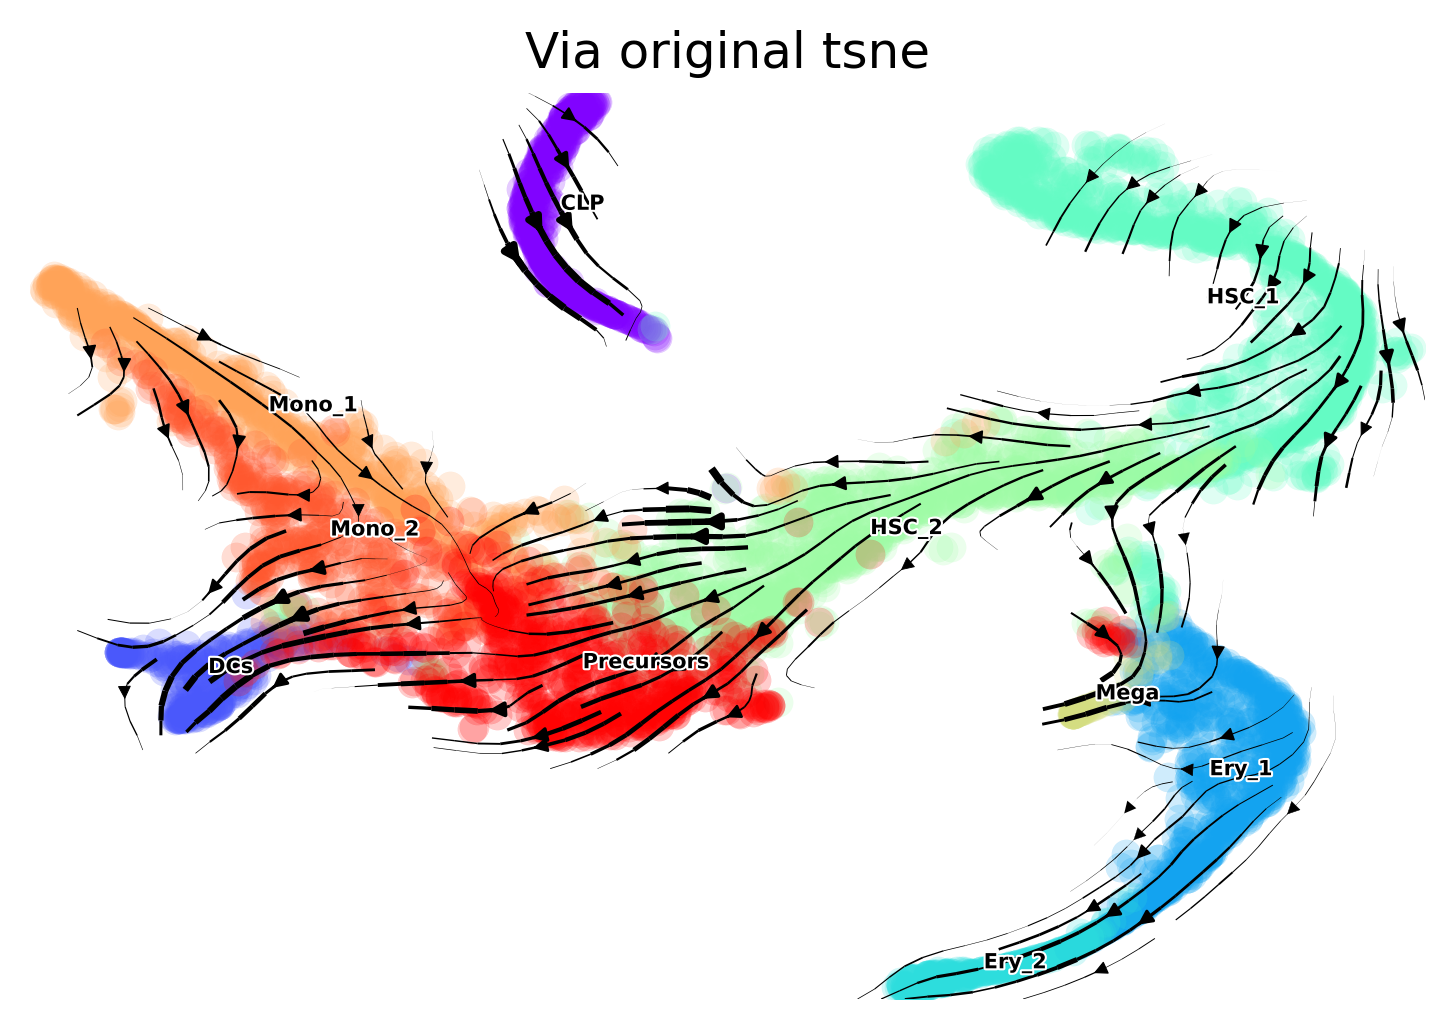

In [27]:
via.via_streamplot(via_coarse=v0, embedding=embedding_original, scatter_size=50, scatter_alpha=0.2,
                   marker_edgewidth=0.05, density_stream=2.0, density_grid=1, smooth_transition=2,
                   smooth_grid=0.5, color_scheme='annotation', add_outline_clusters=False,
                   cluster_outline_edgewidth=0.001, title='Via original tsne')
plt.show()


**Recompute tsne**
The less of a gap between the CLP cluster and the main body of cells, the less of a misinterpreted arrow we have at the CLP. 

recompute tsne...


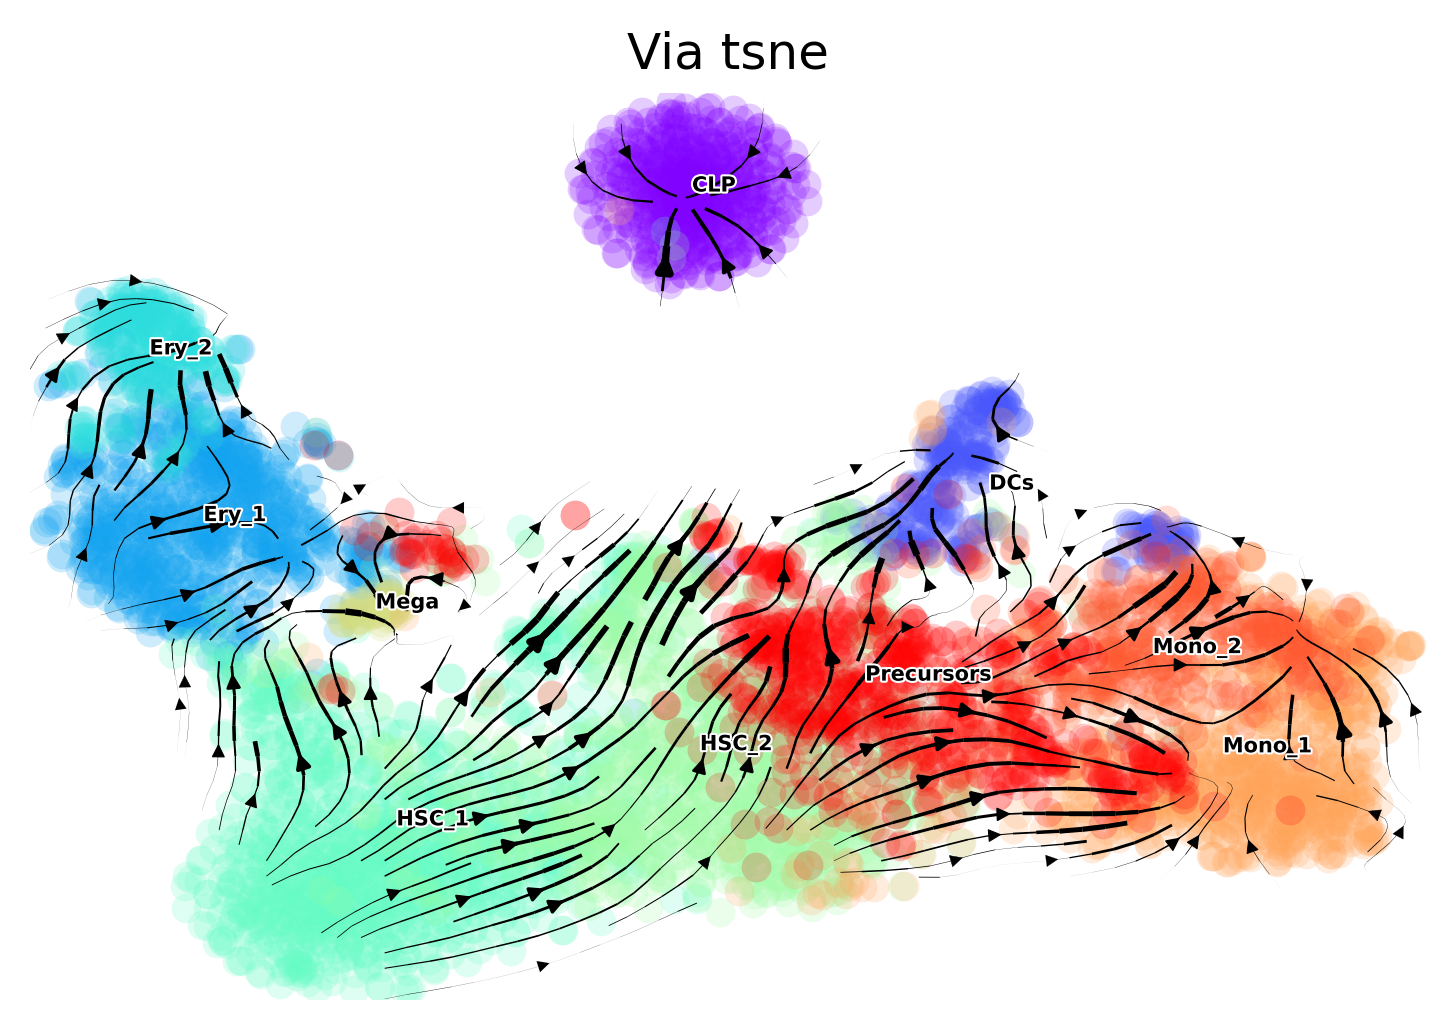

In [17]:
print('recompute tsne...')
sc.tl.tsne(adata)
embedding_tsne = adata.obsm['X_tsne']

via.via_streamplot(via_coarse=v0, embedding=embedding_tsne, scatter_size=50, scatter_alpha=0.2,
                       marker_edgewidth=0.05, density_stream=2.0, density_grid=1, smooth_transition=2,
                       smooth_grid=0.5, color_scheme='annotation', add_outline_clusters=False,
                       cluster_outline_edgewidth=0.001, title='Via tsne')
plt.show()


**Plot on Umap**
Use scanpy's default umap implementation. Vector field of trajectory colored by cell type and pseudotime

graph.data.size 285080
graph.data.size 284804 284804


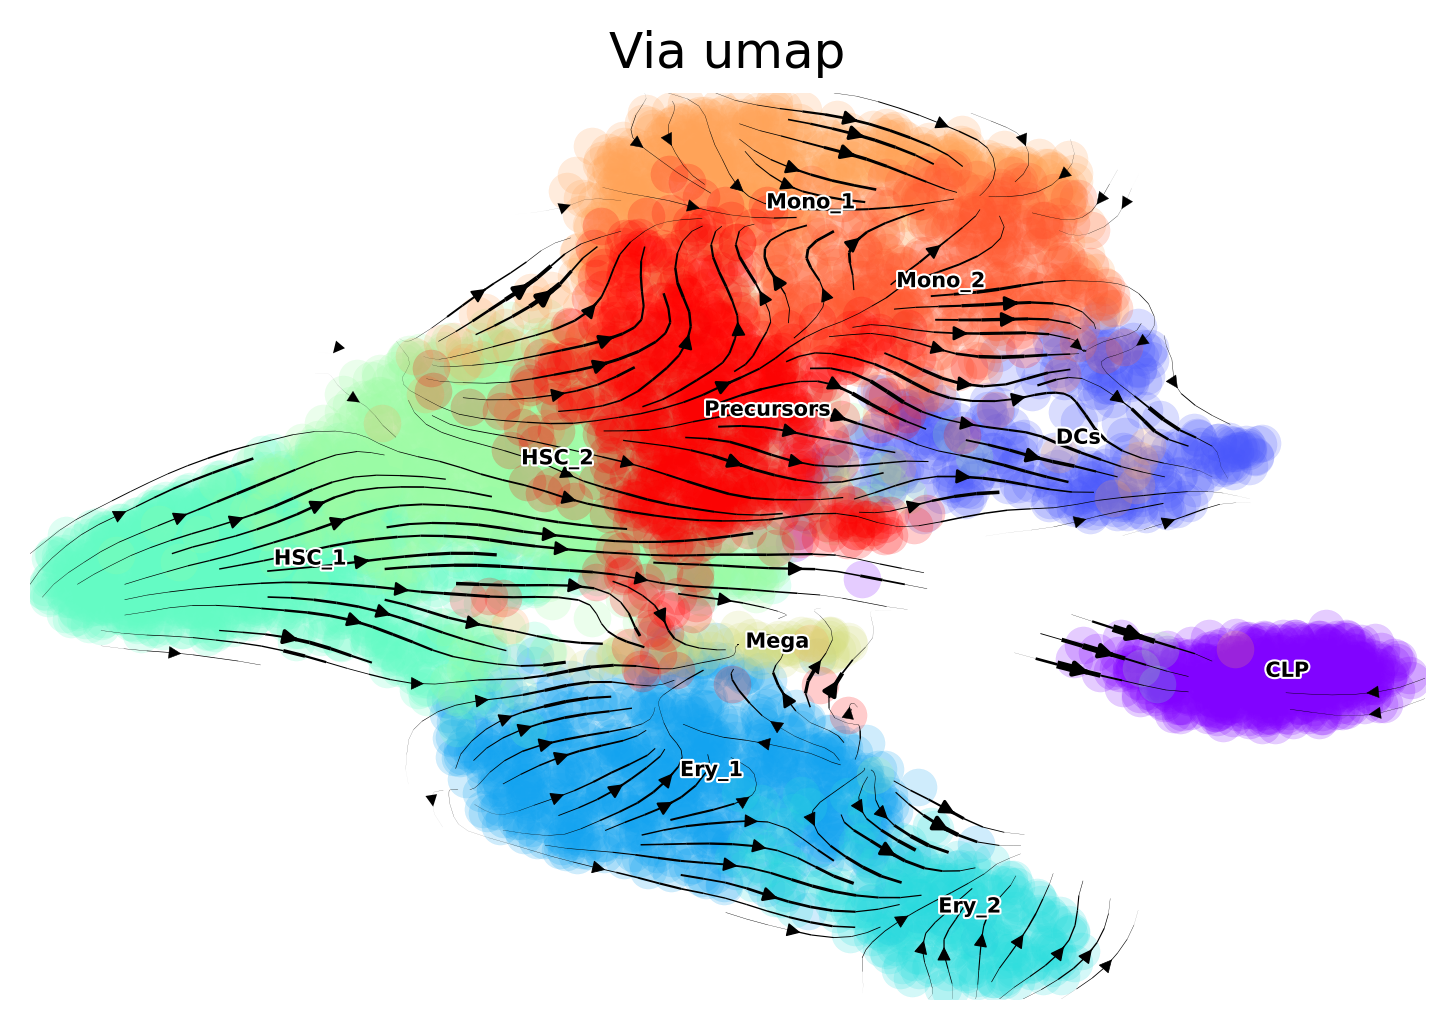

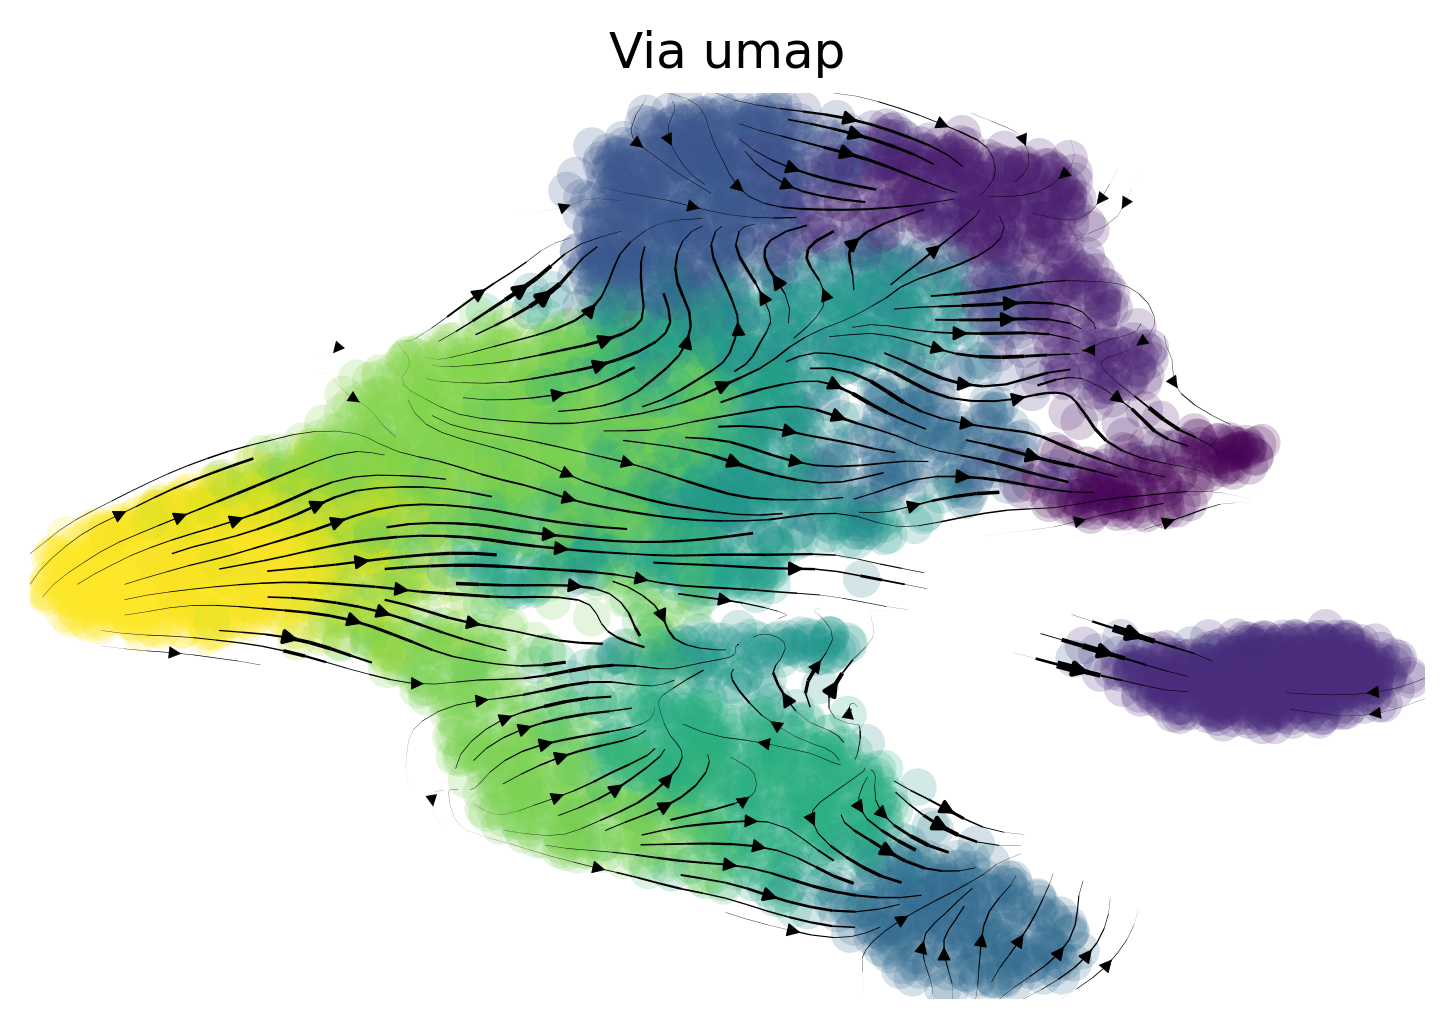

In [28]:
sc.tl.umap(adata, min_dist=0.8)
embedding_umap = adata.obsm['X_umap']

via.via_streamplot(via_coarse=v0, embedding=embedding_umap, scatter_size=80, scatter_alpha=0.2,
                   marker_edgewidth=0.05, density_stream=2.0, density_grid=1, smooth_transition=1,
                   smooth_grid=0.5, color_scheme='annotation', add_outline_clusters=False,
                   cluster_outline_edgewidth=0.001, title='Via umap')
plt.show()


via.via_streamplot(via_coarse=v0, embedding=embedding_umap, scatter_size=80, scatter_alpha=0.2,
                   marker_edgewidth=0.05, density_stream=2.0, density_grid=1, smooth_transition=1,
                   smooth_grid=0.5, color_scheme='time', add_outline_clusters=False,
                   cluster_outline_edgewidth=0.001, title='Via umap')
plt.show()

### Lineage Paths
See the differentiation likelihood from the HSC-1 towards each of the detected final states (outlined in Red as detected by VIA)

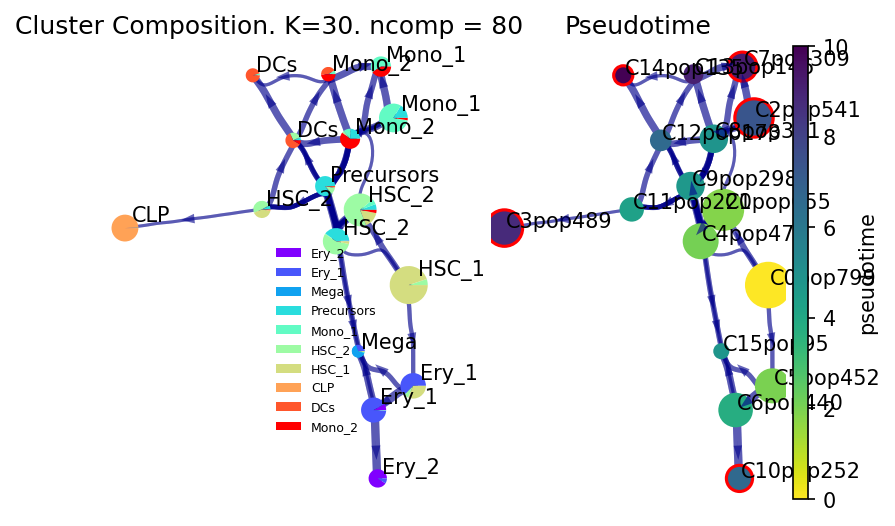

Cluster path on clustergraph starting from Root Cluster 0 to Terminal Cluster 2 : [0, 1, 8, 2]
Cluster path on clustergraph starting from Root Cluster 0 to Terminal Cluster 3 : [0, 1, 8, 12, 11, 3]
Cluster path on clustergraph starting from Root Cluster 0 to Terminal Cluster 7 : [0, 1, 8, 2, 7]
Cluster path on clustergraph starting from Root Cluster 0 to Terminal Cluster 10 : [0, 1, 4, 15, 6, 10]
Cluster path on clustergraph starting from Root Cluster 0 to Terminal Cluster 14 : [0, 1, 8, 12, 14]
2022-04-29 11:57:04.548609	Cluster level path on sc-knnGraph from Root Cluster 0 to Terminal Cluster 1 along path: [5, 5, 4, 4, 4, 4, 4, 4, 4]
2022-04-29 11:57:04.572205	Cluster level path on sc-knnGraph from Root Cluster 0 to Terminal Cluster 2 along path: [5, 5, 4, 8, 2, 2, 2]
2022-04-29 11:57:04.593602	Cluster level path on sc-knnGraph from Root Cluster 0 to Terminal Cluster 3 along path: [5, 5, 11, 3, 3, 3, 3]
2022-04-29 11:57:04.615902	Cluster level path on sc-knnGraph from Root Cluster 0 

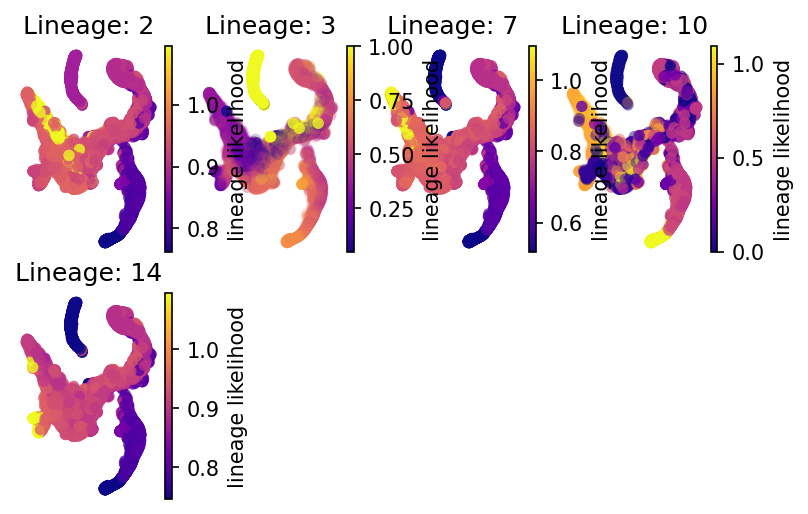

In [29]:
v0.draw_piechart_graph()

via.draw_sc_lineage_probability(v0,v0, embedding=embedding)
plt.show()

